In [1]:
# for creating a responsive plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math
import awkward as ak

In [3]:

file = uproot.open('../files/nue_dune10kt_1x2x6_1106_617_20230826T163359Z_gen_g4_detsim_hitreco_VenusaurusTrainingFiles.root')
tree = file['venusaurus/venusaur']
branches = tree.arrays()

In [8]:
INDEX = 1

In [9]:
print('PDG: ', branches['TruePDG'][INDEX])
print('Run: ', branches['Run'][INDEX])
print('Subrun: ', branches['Subrun'][INDEX])
print('Event: ', branches['Event'][INDEX])
print('TrackScore: ', branches['TrackScore'][INDEX])
print('Completeness: ', branches['Completeness'][INDEX])
print('Purity: ', branches['Purity'][INDEX])

PDG:  211
Run:  1106
Subrun:  1
Event:  61701
TrackScore:  0.70896536
Completeness:  0.9376499
Purity:  0.88863635


x_true:  [-77.1, -70.1]
y_true:  [-449, -477]
z_true:  [256, 336]


AttributeError: no field named 'size'

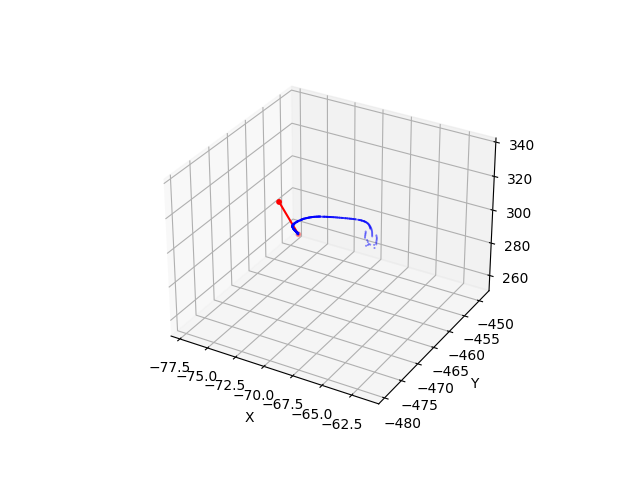

In [10]:
# RecoStart Fitting

# Plot SpacePoints
x = branches['SpacePoints'][INDEX][:,0]
y = branches['SpacePoints'][INDEX][:,1]
z = branches['SpacePoints'][INDEX][:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')

x_recoStart = branches['FitPositions_recoStart'][INDEX][:,0]
y_recoStart = branches['FitPositions_recoStart'][INDEX][:,1]
z_recoStart = branches['FitPositions_recoStart'][INDEX][:,2]

print('x_true: ', x_recoStart)
print('y_true: ', y_recoStart)
print('z_true: ', z_recoStart)
ax.scatter(x_recoStart, y_recoStart, z_recoStart, color = "red", s = 10)
ax.plot(x_recoStart, y_recoStart, z_recoStart, color = "red")

# show plot
plt.show()

x_track:  [-77.1, -77.1, -77.1, -77.1, -77, -77, ..., -61.9, -61.9, -61.8, -61.7, -61.7]
y_track:  [-449, -449, -449, -449, -449, -449, ..., -478, -478, -478, -479, -479, -479]
z_track:  [256, 256, 257, 257, 257, 257, 258, 258, ..., 332, 332, 332, 332, 332, 333, 333]


AttributeError: no field named 'size'

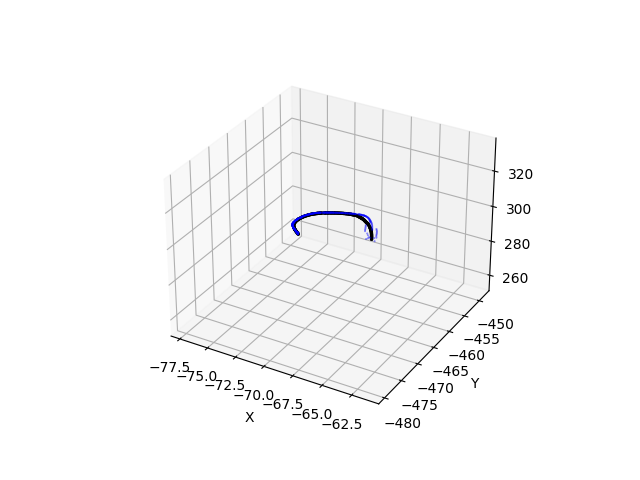

In [11]:
# Sliding linear fit

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

x_track = branches['FitPositions_track'][INDEX][:,0]#[branches['FitPositions_track'][INDEX][:,0] > -999]
y_track = branches['FitPositions_track'][INDEX][:,1]#[branches['FitPositions_track'][INDEX][:,1] > -999]
z_track = branches['FitPositions_track'][INDEX][:,2]#[branches['FitPositions_track'][INDEX][:,2] > -999]

print('x_track: ', x_track)
print('y_track: ', y_track)
print('z_track: ', z_track)
ax.scatter(x_track, y_track, z_track, color = "black", s = 2)
ax.plot(x_track, y_track, z_track, color = "black")

# show plot
plt.show()

TrackScore:  0.70896536
Fitting as a track


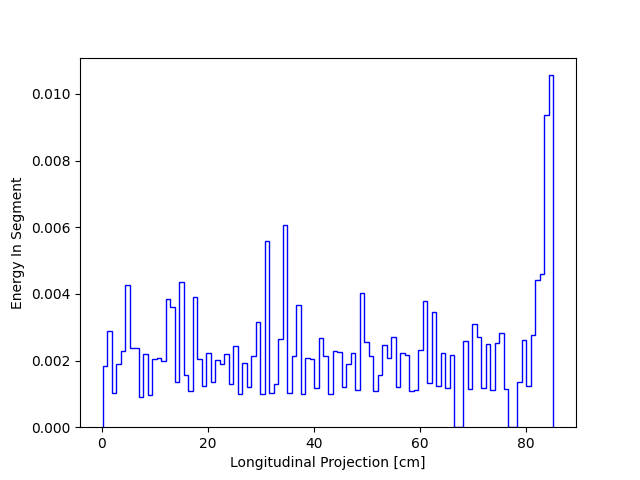

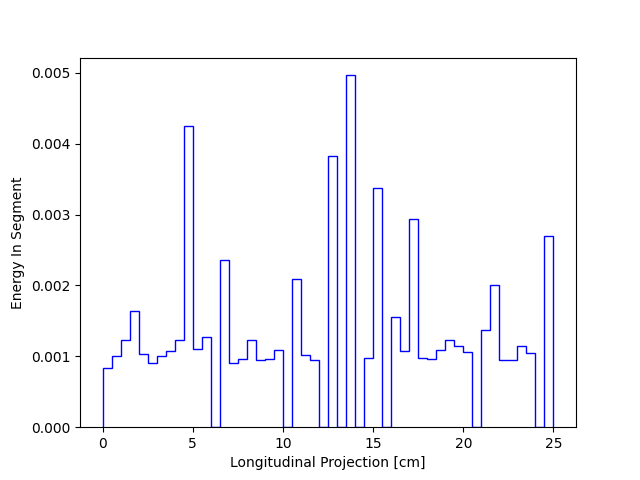

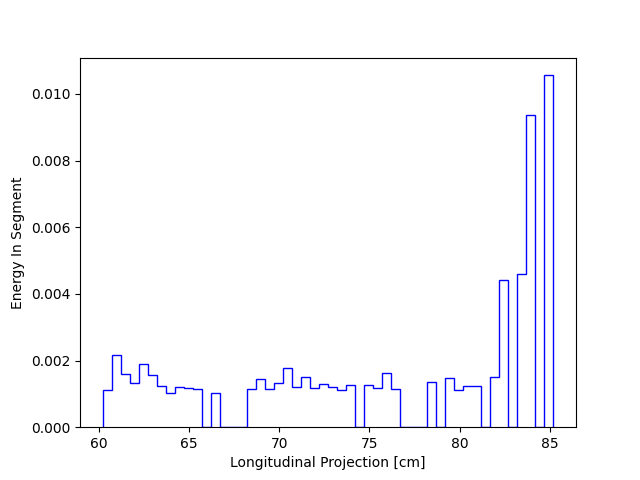

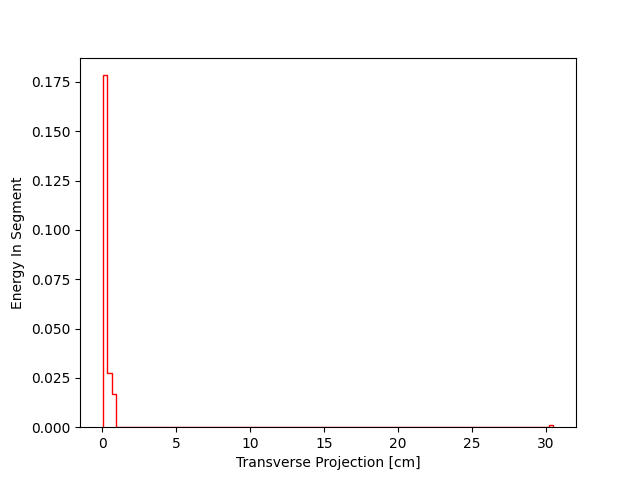

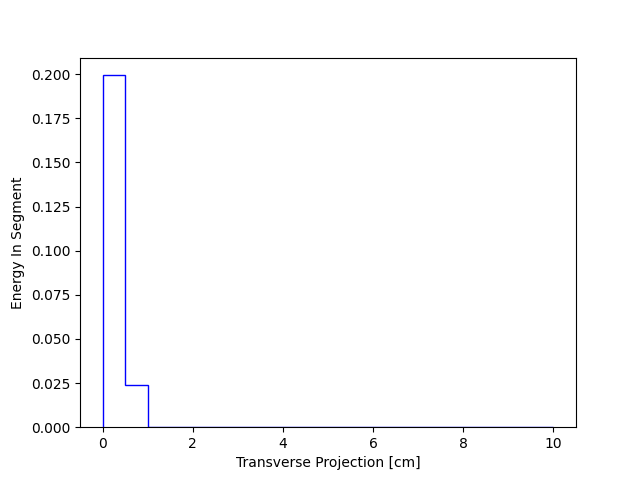

In [16]:
# Plot profiles

#######################################
# Some plot parameters
#######################################
extremaLength = 25.0 #To define start and end regions
moliereRadius = 10.0
nBinsLong = 50
nBinsTransv = 20

print('TrackScore: ', branches['TrackScore'][INDEX])

#######################################
# Get appropriate fit
#######################################
if (branches['TrackScore'][INDEX] > 0.5) :
    print('Fitting as a track')
    longitudinal = branches['Longitudinal_track'][INDEX]
    transverse = branches['Transverse_track'][INDEX]
    energy = branches['Energy_track'][INDEX]
else :
    print('Fitting as a shower')
    longitudinal = branches['Longitudinal_recoStart'][INDEX]
    transverse = branches['Transverse_recoStart'][INDEX]
    energy = branches['Energy_recoStart'][INDEX]
    
#######################################
# Whole Longitudinal Profile
#######################################
figLong = plt.figure()
plt.hist(longitudinal, bins=100, weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Start 25cm of Longitudinal Profile
#######################################
figStartLong = plt.figure()
plt.hist(longitudinal, bins=nBinsLong, range=[0,extremaLength], weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# End 25cm of Longitudinal Profile
#######################################
figEndLong = plt.figure()
maxL = np.max(np.array(longitudinal))
plt.hist(longitudinal, bins=nBinsLong, range=[(maxL - extremaLength), maxL], weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Whole Transverse Profile
#######################################
figTransv = plt.figure()
plt.hist(transverse, bins=100, weights=energy, color='red', histtype='step')
plt.xlabel('Transverse Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Moliere Radius Transverse Profile
#######################################
figTransvMol = plt.figure()
plt.hist(transverse, bins=nBinsTransv, range=[0, moliereRadius], weights=energy, color='blue', histtype='step')
plt.xlabel('Transverse Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()


In [13]:
targetNBins_l = 50 # This equates to 25cm in length
binWidth_l = 0.5

targetNBins_t = 20 # This equates to 10cm in length - moliere radius
binWidth_t = 0.5

long_ak = tree['Longitudinal_track'].array()
trans_ak = tree['Longitudinal_track'].array()
energy_ak = tree['Energy_track'].array()

# Define numpy arrays to fill 
longitudinalProfile_start = np.empty((0, targetNBins_l))
longitudinalBinIndicies_start = np.empty((0, targetNBins_l))

longitudinalProfile_end = np.empty((0, targetNBins_l))
longitudinalBinIndicies_end = np.empty((0, targetNBins_l))

transverseProfile = np.empty((0, targetNBins_t))
transverseProfile = np.empty((0, targetNBins_t))

# Fill numpy arrays
for entry in range(0, len(long_ak)) :
    #################################
    # Transverse
    #################################
    
    #################################
    # Longitudinal
    #################################
    # Work out how many bins the trajectory covers
    thisMaxL = ak.max(long_ak[entry])
    thisNBins = math.ceil(thisMaxL / binWidth_l)

    # Turn into a histogram
    thisLongProfile, edges = np.histogram(long_ak[entry].to_numpy(), thisNBins, range=[0, thisMaxL], weights=energy_ak[entry].to_numpy())

    # Pad if needed
    if (thisNBins < targetNBins_l) :
        thisLongProfile = np.concatenate((thisLongProfile, np.zeros(targetNBins_l - thisNBins)), axis=0)

    # Get position indexing vector
    thisBinIndexVector = np.arange(0, len(thisLongProfile))

    # Get start and end vectors
    thisLongProfile_start = thisLongProfile[0 : targetNBins_l]
    thisBinIndexVector_start = thisBinIndexVector[0 : targetNBins_l]

    thisLongProfile_end = thisLongProfile[(thisNBins - targetNBins_l) : ]
    thisBinIndexVector_end = thisBinIndexVector[(thisNBins - targetNBins_l) : ]
    
    longitudinalProfile_start = np.concatenate((longitudinalProfile_start, thisLongProfile_start.reshape(1,targetNBins_l)), axis=0)

    
print(longitudinalProfile_start)

[[0.00157565 0.         0.00260592 0.0015677  0.         0.
  0.00602757 0.00176733 0.         0.00361758 0.00401657 0.00514364
  0.         0.00394055 0.0039302  0.00437635 0.00486693 0.
  0.00600197 0.00510372 0.00821073 0.         0.00586229 0.00610512
  0.00677126 0.00524408 0.         0.00420285 0.00410771 0.00408494
  0.00527346 0.         0.00424763 0.00582131 0.0039536  0.00473178
  0.00311273 0.00584412 0.         0.00351914 0.         0.00152146
  0.01129418 0.         0.         0.00550091 0.00223836 0.00992183
  0.         0.        ]
 [0.00084006 0.00100725 0.0012274  0.00164664 0.00102811 0.00090007
  0.00100243 0.00107062 0.00122723 0.00331429 0.00203348 0.00127527
  0.         0.00236295 0.00090015 0.0009611  0.00123207 0.00095302
  0.         0.00206071 0.         0.00209055 0.00102515 0.00095251
  0.         0.00383368 0.         0.00496692 0.         0.00097618
  0.00337505 0.         0.00156138 0.00107137 0.00178625 0.0021239
  0.00096418 0.00108426 0.00122697 0.001

In [ ]:
# Plot SpacePoints
x = branches['SpacePoints'][INDEX][:,0]
y = branches['SpacePoints'][INDEX][:,1]
z = branches['SpacePoints'][INDEX][:,2]

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

#True fitting
'''
x_true = branches['FitPositions_true'][INDEX][:,0]
y_true = branches['FitPositions_true'][INDEX][:,1]
z_true = branches['FitPositions_true'][INDEX][:,2]

print('x_true: ', x_true)
print('y_true: ', y_true)
print('z_true: ', z_true)
ax.scatter(x_true, y_true, z_true, color = "black", s = 10)
ax.plot(x_true, y_true, z_true, color = "black")
'''

# RecoStart Fitting

x_recoStart = branches['FitPositions_recoStart'][INDEX][:,0]
y_recoStart = branches['FitPositions_recoStart'][INDEX][:,1]
z_recoStart = branches['FitPositions_recoStart'][INDEX][:,2]

print('x_true: ', x_recoStart)
print('y_true: ', y_recoStart)
print('z_true: ', z_recoStart)
ax1.scatter(x_recoStart, y_recoStart, z_recoStart, color = "red", s = 10)
ax1.plot(x_recoStart, y_recoStart, z_recoStart, color = "red")

# show plot
plt.show()

# PCA Fitting
'''
x_pca = branches['FitPositions_pca'][INDEX][:,0]
y_pca = branches['FitPositions_pca'][INDEX][:,1]
z_pca = branches['FitPositions_pca'][INDEX][:,2]

print('x_pca: ', x_pca)
print('y_pca: ', y_pca)
print('z_pca: ', z_pca)
ax.scatter(x_pca, y_pca, z_pca, color = "black", s = 10)
ax.plot(x_pca, y_pca, z_pca, color = "black")
'''

# TrackStub Fitting
'''
x_trackStub = branches['FitPositions_trackStub'][INDEX][:,0]
y_trackStub = branches['FitPositions_trackStub'][INDEX][:,1]
z_trackStub = branches['FitPositions_trackStub'][INDEX][:,2]

print('x_trackStub: ', x_trackStub)
print('y_trackStub: ', y_trackStub)
print('z_trackStub: ', z_trackStub)
ax.scatter(x_trackStub, y_trackStub, z_trackStub, color = "black", s = 10)
ax.plot(x_trackStub, y_trackStub, z_trackStub, color = "black")
'''

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

ax2.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

# Sliding linear fit

x_track = branches['FitPositions_track'][INDEX][:,0]#[branches['FitPositions_track'][INDEX][:,0] > -999]
y_track = branches['FitPositions_track'][INDEX][:,1]#[branches['FitPositions_track'][INDEX][:,1] > -999]
z_track = branches['FitPositions_track'][INDEX][:,2]#[branches['FitPositions_track'][INDEX][:,2] > -999]

print('x_track: ', x_track)
print('y_track: ', y_track)
print('z_track: ', z_track)
ax2.plot(x_track, y_track, z_track, color = "black")

# show plot
plt.show()



